In [42]:
#primero importamos librerias necesarias
import pandas as pd
import numpy as np
# Configuración para mostrar gráficas en notebook
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression
###
import seaborn as sb

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
#primer dataset, correspondiende al crecimiento de población de distintos paises, por año
df1 = pd.read_csv("Datasets/API_SP.POP.GROW_DS2_en_csv_v2_2164049.csv") 
df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122,NaN
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.898476,1.965751,2.029893,2.090248,2.147567,...,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817,NaN
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.393363,1.383629,1.256555,0.973962,0.617544,...,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983,NaN
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,NaN,3.120855,3.056731,2.953749,2.880686,2.754021,...,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,NaN
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,NaN,6.941532,6.692697,6.559522,6.241511,5.998800,...,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Population growth (annual %),SP.POP.GROW,NaN,1.986474,2.857337,2.777956,2.702867,2.631731,...,0.859067,0.895255,0.607468,-0.294474,-1.364932,-0.596734,0.753585,0.339011,-0.157992,NaN
260,"Yemen, Rep.",YEM,Population growth (annual %),SP.POP.GROW,NaN,1.450869,1.484101,1.506678,1.515090,1.515578,...,2.779988,2.757339,2.716520,2.654141,2.578072,2.498247,2.424025,2.357023,2.300580,NaN
261,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,NaN,2.453268,2.486399,2.514285,2.535788,2.552486,...,1.525314,1.583107,1.605752,1.583168,1.528926,1.464829,1.407741,1.357697,1.338617,NaN
262,Zambia,ZMB,Population growth (annual %),SP.POP.GROW,NaN,3.001073,2.998554,3.004536,3.022485,3.049879,...,3.020291,3.102770,3.139812,3.121305,3.066875,3.003346,2.951583,2.912801,2.892373,NaN


In [4]:
#ver si hay valores nulos en el df
df1.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
1960               True
                  ...  
2016               True
2017               True
2018               True
2019               True
2020               True
Length: 65, dtype: bool

In [5]:
#vemos que hay valores nulos en todas las columnas
# cantidad de valores nulos por columnas
df1.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2016                2
2017                2
2018                2
2019                2
2020              264
Length: 65, dtype: int64

In [6]:
# borrar de df1 las columnas correspondientes a los años anteriores a 2000 que es donde está mas incompleto
# y el año 2020 porque no tiene datos
# axis=1 significa que quiero dropear columnas
df1=df1.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966','1967','1968','1969'],axis=1)
df1=df1.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976','1977','1978','1979'],axis=1)
df1=df1.drop(['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987','1988','1989'],axis=1)
df1=df1.drop(['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997','1998','1999'],axis=1)
df1=df1.drop(['2020'],axis=1)
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [7]:
# nos quedan los años del 2000 al 2019
# ver si aun quedan NaN en el df
df1.isnull().values.any()

True

In [8]:
# ver en que columnas están los NaN
df1.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
2000               True
2001               True
2002               True
2003               True
2004               True
2005               True
2006               True
2007               True
2008               True
2009               True
2010               True
2011               True
2012               True
2013               True
2014               True
2015               True
2016               True
2017               True
2018               True
2019               True
dtype: bool

In [9]:
# ver que cantidad de valores NaN  hay en cada columna (todos los años tienen varios nulos, ver que hacer)
df1.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2000              1
2001              1
2002              1
2003              1
2004              1
2005              1
2006              1
2007              1
2008              1
2009              1
2010              1
2011              1
2012              2
2013              2
2014              2
2015              2
2016              2
2017              2
2018              2
2019              2
dtype: int64

In [10]:
#como solo hay 1 o 2 filas con valor NaN por columna, borramos las filas que tienen NaN en cualquier columna
df1 = df1.dropna() 
df1
#pasamos de 264 filas en el df original a 262

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Population growth (annual %),SP.POP.GROW,-3.582128,0.067859,0.067931,0.067885,0.067839,0.067910,...,0.803249,0.859067,0.895255,0.607468,-0.294474,-1.364932,-0.596734,0.753585,0.339011,-0.157992
260,"Yemen, Rep.",YEM,Population growth (annual %),SP.POP.GROW,2.842719,2.883516,2.889575,2.892683,2.881947,2.861969,...,2.795788,2.779988,2.757339,2.716520,2.654141,2.578072,2.498247,2.424025,2.357023,2.300580
261,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,1.409029,1.333293,1.263918,1.223839,1.217777,1.237753,...,1.455280,1.525314,1.583107,1.605752,1.583168,1.528926,1.464829,1.407741,1.357697,1.338617
262,Zambia,ZMB,Population growth (annual %),SP.POP.GROW,2.679439,2.617614,2.580520,2.564828,2.577369,2.611388,...,2.914663,3.020291,3.102770,3.139812,3.121305,3.066875,3.003346,2.951583,2.912801,2.892373


In [11]:
#realizamos el mismo procedimiento para el segundo dataset
df2 = pd.read_csv("Datasets/GDP_annual_growth_NEW.csv") 
df2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959,-2.929511,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-1.934778,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.869754,3.763086,7.312637,5.450582,4.036111,...,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694,-0.934728,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-4.040510,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.809625,3.441471,1.222801,4.095283,4.070291,4.226086,3.813315,4.941932,-6.888013,NaN
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.392886,4.823415,-0.188574,-27.994546,-9.375124,-5.071796,0.752447,NaN,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844751,6.177883,7.373613,7.939782,6.122761,...,2.213355,2.485201,1.846992,1.193733,0.399088,1.414513,0.787056,0.152583,-6.959604,NaN
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034378,1.441785,-3.016189,NaN


In [12]:
# borrar de df2 las columnas correspondientes a los años anteriores a 2000 (porque tiene datos incompletos anteriores a esa fecha)
# y el año 2020 que eliminó de df1 porque no tiene datos, así quedan similares los dfs
df2=df2.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966','1967','1968','1969'],axis=1)
df2=df2.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976','1977','1978','1979'],axis=1)
df2=df2.drop(['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987','1988','1989'],axis=1)
df2=df2.drop(['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997','1998','1999'],axis=1)
df2=df2.drop(['2020'],axis=1)
df2=df2.drop(['Unnamed: 65'],axis=1) #borro esta xq es basura
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,7.616588,-2.971257,-3.273646,1.975547,7.911563,1.214349,...,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,8.832278,1.414118,11.229715,...,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644


In [13]:
# ver que cantidad de valores NaN  hay en cada columna (todos los años tienen varios nulos, ver que hacer)
df2.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
2000              27
2001              21
2002              20
2003              15
2004              15
2005              14
2006              14
2007              13
2008              15
2009              14
2010              14
2011              14
2012              14
2013              14
2014              12
2015              13
2016              14
2017              14
2018              15
2019              20
dtype: int64

In [14]:
#todavia quedan muchas columnas con valores NaN, pensar si es más conveniente reducir los años aun mas o eliminar los paises
#con menos informacion disponible

In [15]:
#borramos todas las filas que tengan valor nulo
df2 = df2.dropna() 
df2
#pasamos de 262 filas a 226, pero igual consideramos que son suficientes paises para seguir con el analisis, se tendrá en cuenta a la hora
#de presentar los resultados que no fueron tomados en cuenta absolutamente todos los paises.

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644
5,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,...,3.706892,2.545322,1.417526,1.001987,1.774487,2.218752,3.314805,3.802197,4.071301,2.173692
6,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,...,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,World,WLD,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,4.490553,2.029758,2.339500,3.170969,4.468110,4.067022,...,4.487379,3.334494,2.698410,2.870534,3.127884,3.164987,2.803578,3.386968,3.241819,2.561760
260,Samoa,WSM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.918794,6.939762,4.343996,4.515482,4.625001,4.156490,...,0.479159,4.173393,-4.088724,-0.418844,0.078245,4.272189,8.054160,1.044880,-2.063273,3.580626
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,4.200003,2.699995,3.700382,2.949079,4.554553,5.277056,...,3.039731,3.284168,2.213355,2.485201,1.846992,1.193733,0.399088,1.414513,0.787056,0.152583
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.897323,5.316868,4.506014,6.944974,7.032395,7.235599,...,10.298223,5.564602,7.597593,5.057232,4.697992,2.920375,3.776679,3.504336,4.034378,1.441785


In [35]:
#mergeamos los datasets por el country code
df_merged = df2.merge(df1, how='inner', left_on='Country Name', right_on='Country Name',suffixes=('_GDP','_POP'))
print(df_merged.columns)
#como anteriormente borre filas de df1 con nulos, ya en el dataf mergeado no las tengo

Index(['Country Name', 'Country Code_GDP', 'Indicator Name_GDP',
       'Indicator Code_GDP', '2000_GDP', '2001_GDP', '2002_GDP', '2003_GDP',
       '2004_GDP', '2005_GDP', '2006_GDP', '2007_GDP', '2008_GDP', '2009_GDP',
       '2010_GDP', '2011_GDP', '2012_GDP', '2013_GDP', '2014_GDP', '2015_GDP',
       '2016_GDP', '2017_GDP', '2018_GDP', '2019_GDP', 'Country Code_POP',
       'Indicator Name_POP', 'Indicator Code_POP', '2000_POP', '2001_POP',
       '2002_POP', '2003_POP', '2004_POP', '2005_POP', '2006_POP', '2007_POP',
       '2008_POP', '2009_POP', '2010_POP', '2011_POP', '2012_POP', '2013_POP',
       '2014_POP', '2015_POP', '2016_POP', '2017_POP', '2018_POP', '2019_POP'],
      dtype='object')


In [36]:
#dataset
df_merged

,Country Name,Country Code_GDP,Indicator Name_GDP,Indicator Code_GDP,2000_GDP,2001_GDP,2002_GDP,2003_GDP,2004_GDP,2005_GDP,...,2010_POP,2011_POP,2012_POP,2013_POP,2014_POP,2015_POP,2016_POP,2017_POP,2018_POP,2019_POP
0,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
1,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
2,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454
3,Arab World,ARB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.704940,1.644025,0.528377,4.729056,9.074909,5.456800,...,2.383187,2.329922,2.281329,2.224341,2.160102,2.093418,2.019087,1.949024,1.915913,1.924693
4,United Arab Emirates,ARE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,10.852704,1.399085,2.433457,8.800541,9.566437,4.855141,...,7.687055,4.536348,2.154163,0.614130,0.176677,0.527412,1.053281,1.339385,1.503897,1.438780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,World,WLD,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,4.490553,2.029758,2.339500,3.170969,4.468110,4.067022,...,1.203252,1.170040,1.183831,1.183727,1.179816,1.168120,1.162578,1.142040,1.103609,1.074675
222,Samoa,WSM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.918794,6.939762,4.343996,4.515482,4.625001,4.156490,...,0.751950,0.814106,0.859902,0.857814,0.785510,0.669894,0.526740,0.419096,0.397465,0.491829
223,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,4.200003,2.699995,3.700382,2.949079,4.554553,5.277056,...,1.455280,1.525314,1.583107,1.605752,1.583168,1.528926,1.464829,1.407741,1.357697,1.338617
224,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.897323,5.316868,4.506014,6.944974,7.032395,7.235599,...,2.914663,3.020291,3.102770,3.139812,3.121305,3.066875,3.003346,2.951583,2.912801,2.892373


In [37]:
#borramos las columnas repetidas o innecesarias
df_all=df_merged.drop(['Country Code_POP','Indicator Code_POP', 'Indicator Code_GDP','Indicator Name_POP', 'Indicator Name_GDP','Country Code_GDP'],axis=1)
df_all

,Country Name,2000_GDP,2001_GDP,2002_GDP,2003_GDP,2004_GDP,2005_GDP,2006_GDP,2007_GDP,2008_GDP,...,2010_POP,2011_POP,2012_POP,2013_POP,2014_POP,2015_POP,2016_POP,2017_POP,2018_POP,2019_POP
0,Angola,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,11.166138,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
1,Albania,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,5.900084,5.979982,7.499970,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
2,Andorra,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,4.808689,1.553188,-5.559186,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454
3,Arab World,6.704940,1.644025,0.528377,4.729056,9.074909,5.456800,6.165544,4.635315,5.900221,...,2.383187,2.329922,2.281329,2.224341,2.160102,2.093418,2.019087,1.949024,1.915913,1.924693
4,United Arab Emirates,10.852704,1.399085,2.433457,8.800541,9.566437,4.855141,9.837320,3.184390,3.191836,...,7.687055,4.536348,2.154163,0.614130,0.176677,0.527412,1.053281,1.339385,1.503897,1.438780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,World,4.490553,2.029758,2.339500,3.170969,4.468110,4.067022,4.501234,4.445886,1.998304,...,1.203252,1.170040,1.183831,1.183727,1.179816,1.168120,1.162578,1.142040,1.103609,1.074675
222,Samoa,6.918794,6.939762,4.343996,4.515482,4.625001,4.156490,1.968808,6.322645,1.009088,...,0.751950,0.814106,0.859902,0.857814,0.785510,0.669894,0.526740,0.419096,0.397465,0.491829
223,South Africa,4.200003,2.699995,3.700382,2.949079,4.554553,5.277056,5.603798,5.360476,3.191047,...,1.455280,1.525314,1.583107,1.605752,1.583168,1.528926,1.464829,1.407741,1.357697,1.338617
224,Zambia,3.897323,5.316868,4.506014,6.944974,7.032395,7.235599,7.903694,8.352436,7.773896,...,2.914663,3.020291,3.102770,3.139812,3.121305,3.066875,3.003346,2.951583,2.912801,2.892373


In [40]:
corr_matrix=df_all.corr(method='pearson')
corr_matrix

,2000_GDP,2001_GDP,2002_GDP,2003_GDP,2004_GDP,2005_GDP,2006_GDP,2007_GDP,2008_GDP,2009_GDP,...,2010_POP,2011_POP,2012_POP,2013_POP,2014_POP,2015_POP,2016_POP,2017_POP,2018_POP,2019_POP
2000_GDP,1.000000,0.375480,0.315194,0.039902,0.305063,0.248249,0.262658,0.259869,0.188102,-0.070741,...,-0.044864,-0.037699,-0.044701,-0.055338,-0.054981,-0.057347,-0.070458,-0.068762,-0.058441,-0.069311
2001_GDP,0.375480,1.000000,0.456098,0.204933,0.396537,0.337806,0.154228,0.283045,0.296961,0.115405,...,0.091472,0.108265,0.101372,0.098844,0.098743,0.096053,0.092474,0.092797,0.085529,0.103671
2002_GDP,0.315194,0.456098,1.000000,0.391275,0.184968,0.342235,0.362144,0.417644,0.296381,0.072341,...,0.041776,0.048332,0.027557,0.025747,0.034989,0.043046,0.059683,0.068278,0.061284,0.053285
2003_GDP,0.039902,0.204933,0.391275,1.000000,0.046859,0.403754,0.350013,0.361054,0.267225,-0.058931,...,0.049299,0.065198,0.012336,-0.006295,-0.001856,0.002485,0.021349,0.027047,0.040371,0.016755
2004_GDP,0.305063,0.396537,0.184968,0.046859,1.000000,0.402023,0.267075,0.309098,0.406047,0.134558,...,0.211879,0.253520,0.238036,0.224451,0.216450,0.200998,0.190615,0.164303,0.151865,0.163501
2005_GDP,0.248249,0.337806,0.342235,0.403754,0.402023,1.000000,0.489767,0.578008,0.390430,0.175927,...,0.096580,0.083661,0.078553,0.069728,0.072065,0.075979,0.074115,0.069234,0.086250,0.069398
2006_GDP,0.262658,0.154228,0.362144,0.350013,0.267075,0.489767,1.000000,0.618556,0.424809,0.056019,...,0.077042,0.071687,0.077464,0.072766,0.076459,0.086503,0.087019,0.085233,0.081572,0.027493
2007_GDP,0.259869,0.283045,0.417644,0.361054,0.309098,0.578008,0.618556,1.000000,0.491343,0.111212,...,0.017888,0.038625,0.070346,0.080943,0.082709,0.081839,0.067025,0.058986,0.057611,0.017514
2008_GDP,0.188102,0.296961,0.296381,0.267225,0.406047,0.390430,0.424809,0.491343,1.000000,0.389859,...,0.306934,0.360995,0.347062,0.347494,0.353698,0.349142,0.356352,0.344877,0.334291,0.305847
2009_GDP,-0.070741,0.115405,0.072341,-0.058931,0.134558,0.175927,0.056019,0.111212,0.389859,1.000000,...,0.458409,0.490088,0.484151,0.484055,0.495719,0.506265,0.519117,0.506673,0.486184,0.504949


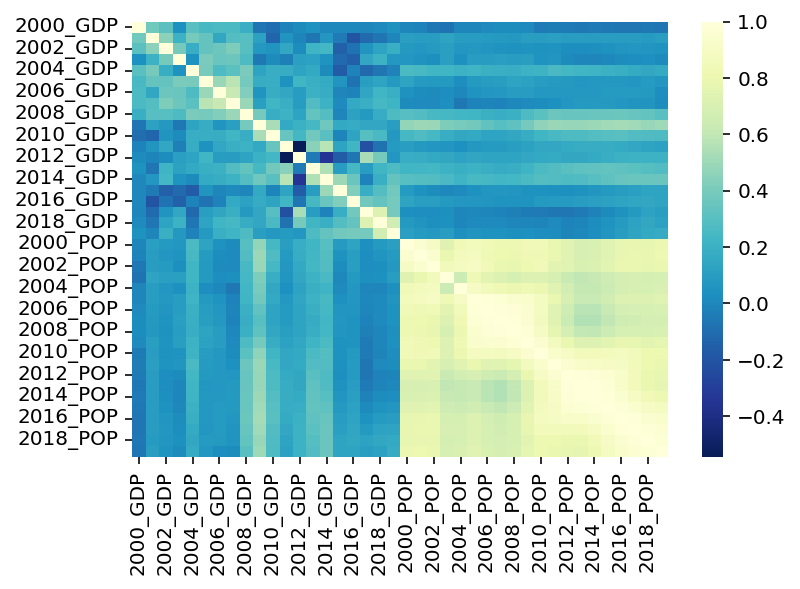

In [47]:
dataplot = sb.heatmap(corr_matrix, cmap="YlGnBu_r", annot=False)
mp.show()

In [39]:
#invertir el dataset fila x columna, comando melt pandas
df_melted = pd.melt(df_all, id_vars=["Country Name"])

print(df_melted)

              Country Name  variable      value
0                   Angola  2000_GDP   3.054624
1                  Albania  2000_GDP   6.950036
2                  Andorra  2000_GDP   3.528362
3               Arab World  2000_GDP   6.704940
4     United Arab Emirates  2000_GDP  10.852704
...                    ...       ...        ...
9035                 World  2019_POP   1.074675
9036                 Samoa  2019_POP   0.491829
9037          South Africa  2019_POP   1.338617
9038                Zambia  2019_POP   2.892373
9039              Zimbabwe  2019_POP   1.419681

[9040 rows x 3 columns]


In [ ]:
#cambiar nombre de variable a numero, dummie variable

In [30]:

#hacemos correlacion entre gdp y poblacion, un pais que tenga crecimiento en ambos es buen candidato
df_matriz=df_all.corr()
df_matriz['2000_POP'].sort_values(ascending=False)

2000_POP    1.000000
2001_POP    0.375480
2002_POP    0.315194
2004_POP    0.305063
2006_POP    0.262658
2007_POP    0.259869
2005_POP    0.248249
2008_POP    0.188102
2013_POP    0.046908
2019_POP    0.046657
2003_POP    0.039902
2007_GDP    0.021862
2008_GDP    0.020536
2012_POP    0.011635
2018_POP    0.010110
2006_GDP    0.009054
2009_GDP    0.005786
2016_POP    0.001717
2015_POP    0.001686
2014_POP    0.000576
2005_GDP   -0.003363
2000_GDP   -0.004038
2017_POP   -0.004409
2004_GDP   -0.005007
2011_POP   -0.015617
2001_GDP   -0.016932
2011_GDP   -0.037699
2012_GDP   -0.044701
2010_GDP   -0.044864
2014_GDP   -0.054981
2013_GDP   -0.055338
2002_GDP   -0.057189
2015_GDP   -0.057347
2018_GDP   -0.058441
2017_GDP   -0.068762
2019_GDP   -0.069311
2016_GDP   -0.070458
2009_POP   -0.070741
2003_GDP   -0.074484
2010_POP   -0.094965
Name: 2000_POP, dtype: float64